In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import SGD

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
folder_path = '/content/gdrive/MyDrive/DLS-codes/HW1'
os.chdir(folder_path)

In [5]:
#train test set
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
X_train = X_train.reshape(-1, (28*28))
X_test = X_test.reshape(-1, (28*28))

In [9]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

Q1. Softmax regression.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (784,)),
    tf.keras.layers.Dense(10,  activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#saving a checkpoint for 20th epoch
class savemodel(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 19:
            self.model.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/model_epoch_20.h5')

In [ ]:
#fit model
num_epochs = 200
history = model.fit(X_train,y_train, epochs = num_epochs, validation_data = (X_test, y_test), callbacks = [savemodel()])

Epoch 1/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7667 - accuracy: 0.8184 - val_loss: 0.4780 - val_accuracy: 0.8788
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4542 - accuracy: 0.8812 - val_loss: 0.3999 - val_accuracy: 0.8949
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4024 - accuracy: 0.8909 - val_loss: 0.3679 - val_accuracy: 0.9020
Epoch 4/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8971 - val_loss: 0.3487 - val_accuracy: 0.9046
Epoch 5/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3598 - accuracy: 0.9015 - val_loss: 0.3366 - val_accuracy: 0.9082
Epoch 6/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3480 - accuracy: 0.9041 - val_loss: 0.3276 - val_accuracy: 0.9105
Epoch 7/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.9062 - val_loss: 0.3204 - val_ac

In [ ]:
#save h5 model
model.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/model_epoch_200.h5')

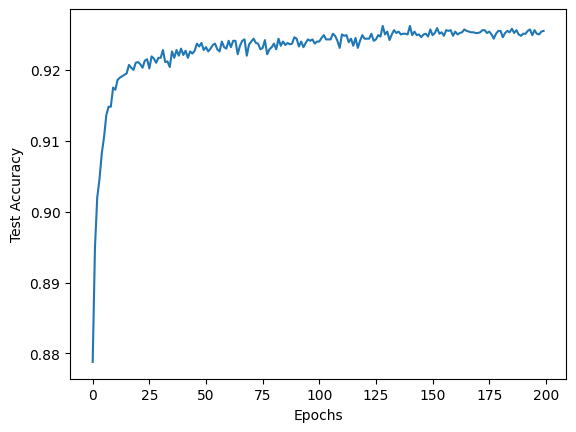

In [ ]:
#plot test accuracy for soft regression
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#write accuracies in a csv file
data = {'Epoch': list(range(1, len(history.history['val_accuracy']) + 1)),
        'Test Accuracy': history.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'softmax-mnist.csv'
df.to_csv(folder + csv_filename, index=False)

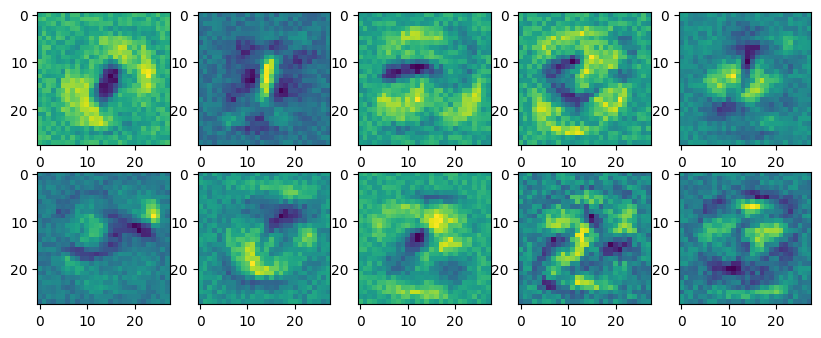

In [ ]:
#plot weight matrix at 20th epoch
model_20 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/model_epoch_20.h5')
weights = model_20.layers[0].get_weights()[0]

#reshape weights into 28x28 arrays, one for each digit 0-9
weights = weights.reshape(28, 28, -1)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:,:,i], cmap='viridis')  # Adjust the cmap as needed
    #plt.title(f'Unit {i+1}')

plt.show()

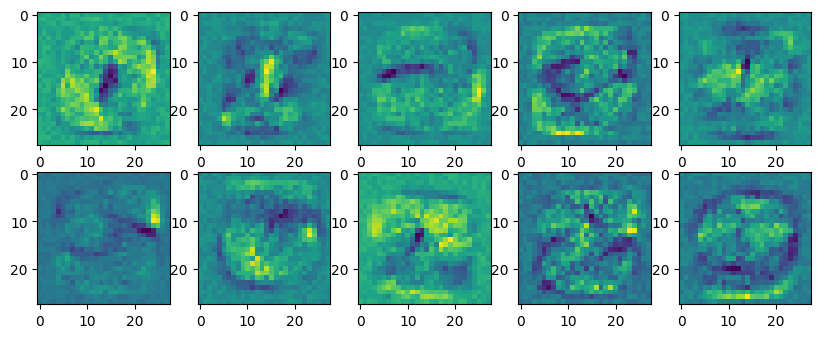

In [ ]:
#plot weight matrix at 200th epoch
model_200 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/model_epoch_200.h5')
weights = model_200.layers[0].get_weights()[0]

#reshape weights into 28x28 arrays, one for each digit 0-9
weights = weights.reshape(28, 28, -1)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:,:,i], cmap='viridis')  # Adjust the cmap as needed
    #plt.title(f'Unit {i+1}')

plt.show()

Q2. 1. Naive autoencoder

In [ ]:
#naive autoencoder
input_img = tf.keras.layers.Input(shape = (784,))
encoder = tf.keras.layers.Dense(100, activation = "sigmoid")(input_img)
decoder = tf.keras.layers.Dense(784, activation = "sigmoid")(encoder)

autoencoder = tf.keras.models.Model(input_img, decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


hyperparameter tuning for autoencoder:learning rate , batch size, activation function, encoding dimension

lr 0.001, mom - 0.9, batch size = 64 loss converge from 0.26 to 0.1

In [ ]:
#fit model
autoencoder.compile(optimizer = SGD(lr = 0.001, momentum = 0.9), loss = "binary_crossentropy", metrics = ['accuracy'])
autoencoder.fit(X_train, X_train, epochs = 200, batch_size = 64, validation_data = (X_test, X_test))

Epoch 1/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2626 - accuracy: 0.0123 - val_loss: 0.2620 - val_accuracy: 0.0148
Epoch 2/200
938/938 [==============================] - 5s 5ms/step - loss: 0.2621 - accuracy: 0.0128 - val_loss: 0.2616 - val_accuracy: 0.0146
Epoch 3/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2617 - accuracy: 0.0126 - val_loss: 0.2611 - val_accuracy: 0.0143
Epoch 4/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2612 - accuracy: 0.0130 - val_loss: 0.2606 - val_accuracy: 0.0150
Epoch 5/200
938/938 [==============================] - 5s 6ms/step - loss: 0.2606 - accuracy: 0.0130 - val_loss: 0.2600 - val_accuracy: 0.0156
Epoch 6/200
938/938 [==============================] - 3s 4ms/step - loss: 0.2600 - accuracy: 0.0137 - val_loss: 0.2594 - val_accuracy: 0.0145
Epoch 7/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2594 - accuracy: 0.0133 - val_loss: 0.2587 - val_accuracy: 0.0149

In [ ]:
#save the .h5 model
autoencoder.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#random 150 X_test samples
random_indices = np.random.choice(X_test.shape[0], 150, replace=False)
X_test_sample = X_test[random_indices]

In [ ]:
#Load h5
autoencoder_h5 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive.h5')
#extract encoder
encoder_model = tf.keras.Model(autoencoder.input, autoencoder.layers[1].output)
#generate encodings on test set
encodings = encoder_model.predict(X_test_sample)

5/5 [==============================] - 0s 2ms/step


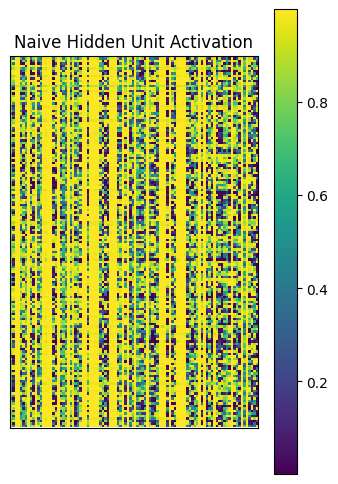

In [ ]:
#plotting hidden activation units
plt.matshow(encodings, cmap='viridis')
plt.title('Naive Hidden Unit Activation')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

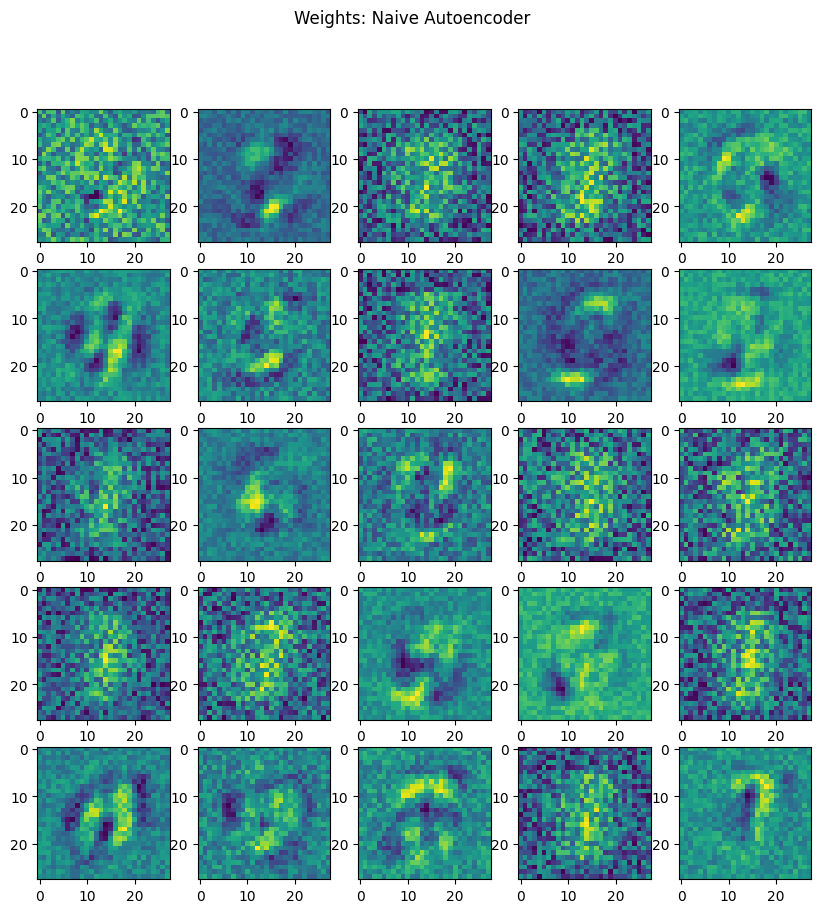

In [ ]:
#plot weight matrix
model = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive.h5')
weights = model.layers[1].get_weights()[0]
weights = weights.reshape(28, 28, -1)

plt.figure(figsize=(10, 10))
plt.suptitle('Weights: Naive Autoencoder')
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:,:,i], cmap='viridis')
plt.show()

1/1 [==============================] - 0s 165ms/step


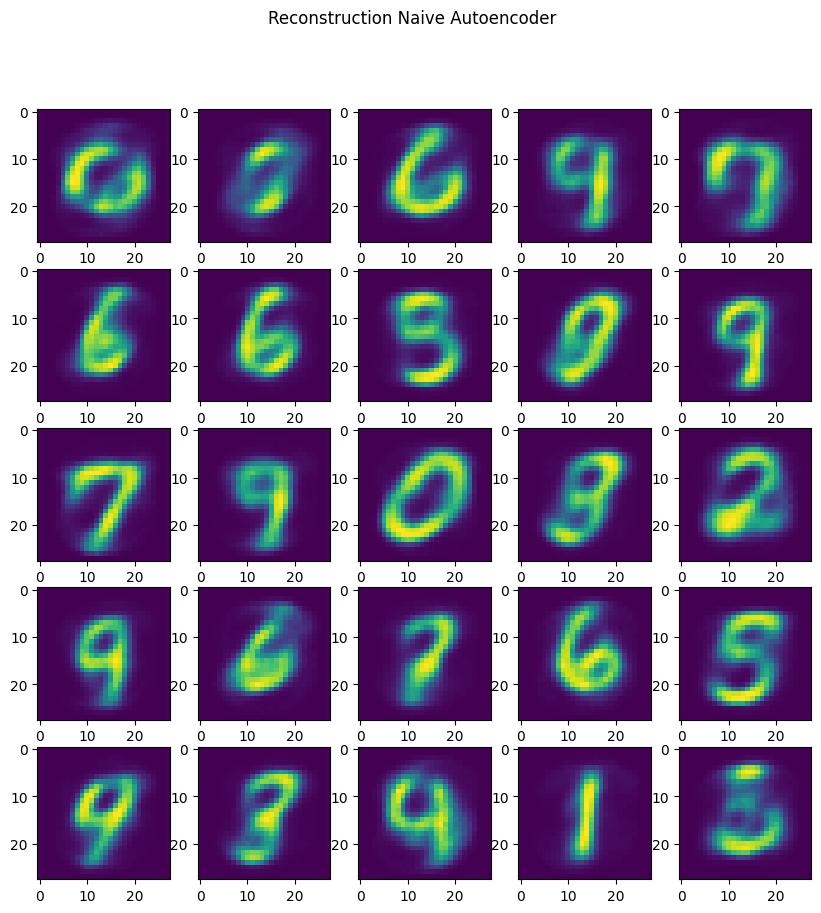

In [ ]:
#reconstruction images
random_indices = np.random.choice(X_test.shape[0], 25, replace=False)
X_test_sample = X_test[random_indices]

model = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive.h5')
ae_naive_decoded = model.predict(X_test_sample)

plt.figure(figsize=(10, 10))
plt.suptitle('Reconstruction Naive Autoencoder')
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(ae_naive_decoded[i].reshape(28,28), cmap='viridis')
plt.show()

In [ ]:
#get encoder weights
autoencoder_h5 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive.h5')
encoder_weights = autoencoder_h5.layers[1].get_weights()

In [ ]:
#model with encoder's weights and adding a hidden layer with 100 and 10 units
ae_naive_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (784,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation = "sigmoid", trainable = False, weights = encoder_weights),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
ae_naive_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 1010 (3.95 KB)
Non-trainable params: 78500 (306.64 KB)
_________________________________________________________________


In [ ]:
#freezing the 1st layer of the weights and assigning the weights of encoder
ae_naive_model.layers[1].trainable = False

In [ ]:
#compile model
ae_naive_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#fit model
history_naive = ae_naive_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200)

Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3027 - accuracy: 0.6579 - val_loss: 0.8608 - val_accuracy: 0.7883
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7722 - accuracy: 0.7960 - val_loss: 0.6885 - val_accuracy: 0.8129
Epoch 3/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6639 - accuracy: 0.8145 - val_loss: 0.6194 - val_accuracy: 0.8261
Epoch 4/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6116 - accuracy: 0.8254 - val_loss: 0.5767 - val_accuracy: 0.8374
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5791 - accuracy: 0.8327 - val_loss: 0.5507 - val_accuracy: 0.8419
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5563 - accuracy: 0.8384 - val_loss: 0.5317 - val_accuracy: 0.8457
Epoch 7/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.8425 - val_loss: 0.5161 - val_ac

In [ ]:
#save model
ae_naive_model.save("/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#write accuracies in a csv file
data = {'Epoch': list(range(1, len(history_naive.history['val_accuracy']) + 1)),
        'Test Accuracy': history_naive.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'naive-ae.csv'
df.to_csv(folder + csv_filename, index=False)

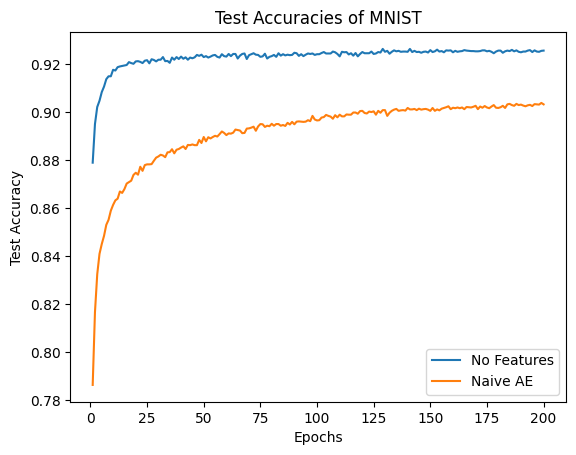

In [ ]:
#plot test accuracy
folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename1 = 'softmax-mnist.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'naive-ae.csv'
df2 = pd.read_csv(folder + csv_filename2)

#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Test Accuracy'], label='No Features')
plt.plot(df2['Epoch'], df2['Test Accuracy'], label='Naive AE')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracies of MNIST')
plt.show()

Q2. 2. Sparse Autoencoder

In [11]:
#sparse autoencoder
input_img = tf.keras.layers.Input(shape = (784,))
initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 0.01)
encoder = tf.keras.layers.Dense(100, activation = "sigmoid", kernel_initializer = initializer)(input_img)
# decoder = tf.keras.layers.Dense(784, activation = "sigmoid")(encoder)

# autoencoder_sparse = tf.keras.models.Model(input_img, decoder)
# autoencoder_sparse.summary()

- lambda = 1, 10, 0.5 with alpha = 0.2 lr 0.01
- lambda = 5 , alpha = 0.1 loss 0.23 to 0.06
- lambda = 7, alpha = 0.2

In [33]:
class SparsityLossLayer(tf.keras.layers.Layer):
    def __init__(self, alpha = 0.1, lambda_ = 5, **kwargs):
        super(SparsityLossLayer, self).__init__(**kwargs)
        self.alpha = alpha
        self.lambda_ = lambda_

    def call(self, inputs):
        kl_div = (
            self.alpha * tf.math.log(self.alpha / tf.clip_by_value(inputs, 1e-10, 1.0)) +
            (1 - self.alpha) * tf.math.log((1 - self.alpha) / tf.clip_by_value(1 - inputs, 1e-10, 1.0))
        )
        sparsity_loss = self.lambda_ * tf.reduce_mean(kl_div)
        self.add_loss(sparsity_loss)
        return inputs

In [34]:
#apply the custom sparsity loss layer to the encoder output
encoder_with_sparsity = SparsityLossLayer()(encoder)

In [39]:
decoder = tf.keras.layers.Dense(784, activation = "sigmoid")(encoder)
#sparse autoencoder
autoencoder_sparse = tf.keras.models.Model(input_img, decoder)
autoencoder_sparse.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
def custom_loss(y_true, y_pred):
    #reconstruction loss
    recon_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return recon_loss

In [40]:
autoencoder_sparse.compile(optimizer= SGD(learning_rate = 0.001), loss=custom_loss, metrics = ['accuracy'])
autoencoder_sparse.fit(X_train, X_train, epochs = 500, batch_size = 32, validation_data = (X_test, X_test))

Epoch 1/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2421 - accuracy: 0.0000e+00 - val_loss: 0.2378 - val_accuracy: 0.0000e+00
Epoch 2/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2335 - accuracy: 1.1667e-04 - val_loss: 0.2294 - val_accuracy: 5.0000e-04
Epoch 3/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2253 - accuracy: 4.8333e-04 - val_loss: 0.2213 - val_accuracy: 6.0000e-04
Epoch 4/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2174 - accuracy: 0.0014 - val_loss: 0.2136 - val_accuracy: 0.0060
Epoch 5/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2098 - accuracy: 0.0041 - val_loss: 0.2063 - val_accuracy: 0.0065
Epoch 6/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2027 - accuracy: 0.0043 - val_loss: 0.1993 - val_accuracy: 0.0065
Epoch 7/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1959 - accuracy: 0.0043 - 

In [41]:
#save the .h5 model
autoencoder_sparse.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse.h5')

In [45]:
#selecting random 150 X_test samples
random_indices = np.random.choice(X_test.shape[0], 150, replace=False)
X_test_sample = X_test[random_indices]

In [46]:
#extract encoder
encoder_sparse_model = tf.keras.models.Model(inputs = autoencoder_sparse.input, outputs = autoencoder_sparse.layers[1].output)
#generate encodings on test set
encoding_sparse = encoder_sparse_model.predict(X_test_sample)

5/5 [==============================] - 0s 2ms/step


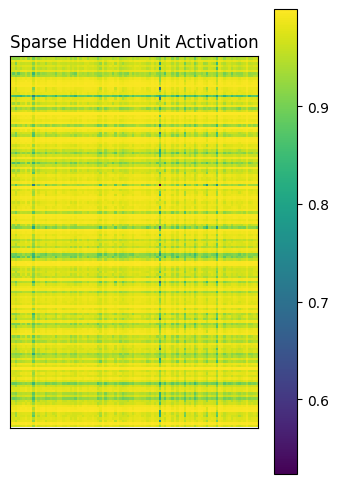

In [47]:
#plotting hidden activation units
plt.matshow(encoding_sparse, cmap='viridis')
plt.title('Sparse Hidden Unit Activation')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

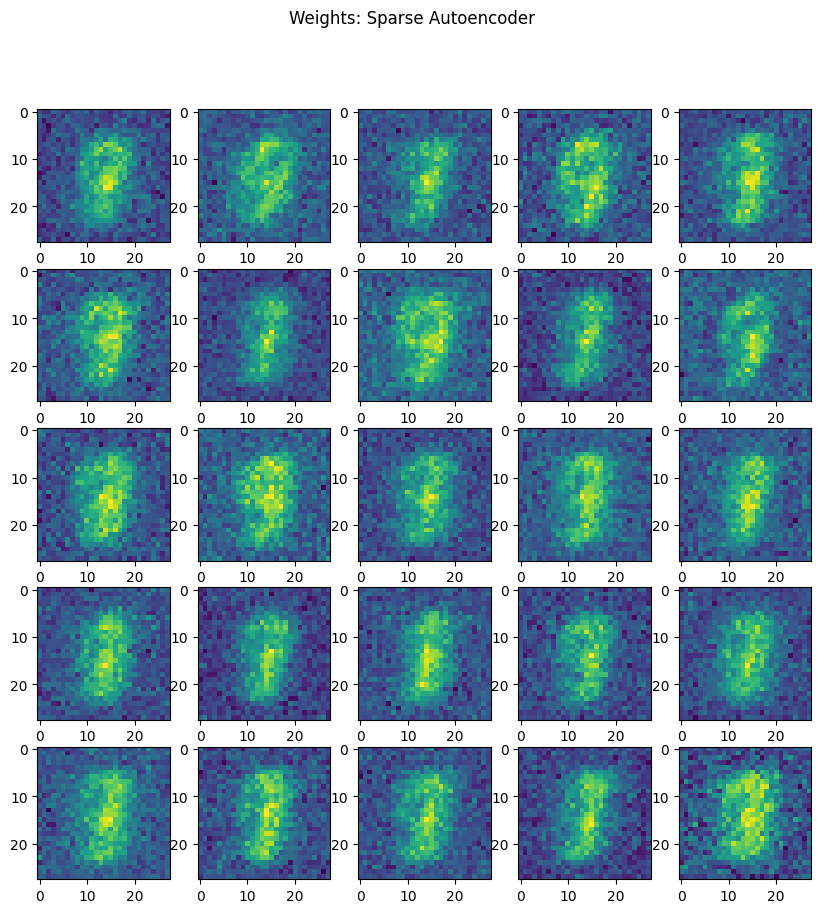

In [13]:
#plot weight matrix
model = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse.h5', custom_objects={'custom_loss': custom_loss})
weights = model.layers[1].get_weights()[0]
weights = weights.reshape(28, 28, -1)

plt.figure(figsize=(10, 10))
plt.suptitle('Weights: Sparse Autoencoder')
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:,:,i], cmap='viridis')
plt.show()

1/1 [==============================] - 0s 181ms/step


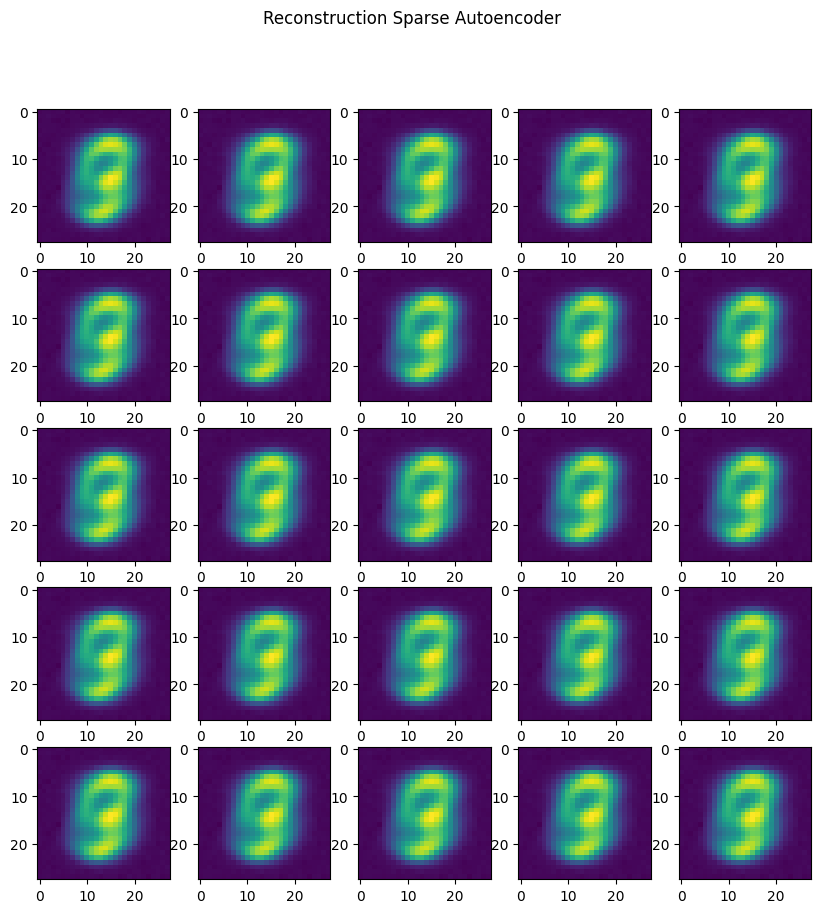

In [14]:
#reconstruction images
random_indices = np.random.choice(X_test.shape[0], 25, replace=False)
X_test_sample = X_test[random_indices]

model = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse.h5', custom_objects={'custom_loss': custom_loss})
ae_sparse_decoded = model.predict(X_test_sample)

plt.figure(figsize=(10, 10))
plt.suptitle('Reconstruction Sparse Autoencoder')
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(ae_sparse_decoded[i].reshape(28,28), cmap='viridis')
plt.show()

In [15]:
#get encoder weights
autoencoder_sparse_h5 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse.h5', custom_objects={'custom_loss': custom_loss})
encoder_sparse_weights = autoencoder_sparse_h5.layers[1].get_weights()

In [16]:
#model with encoder's weights and adding a hidden layer with 100 and 10 units
ae_sparse_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (784,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation = "sigmoid", trainable = False, weights = encoder_sparse_weights),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
ae_sparse_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 1010 (3.95 KB)
Non-trainable params: 78500 (306.64 KB)
_________________________________________________________________


In [17]:
ae_sparse_model.layers[1].trainable = False

In [18]:
#compile model
ae_sparse_model.compile(optimizer = SGD(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
#fit model
history_sparse = ae_sparse_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, batch_size = 16)

Epoch 1/200
3750/3750 [==============================] - 10s 3ms/step - loss: 2.3090 - accuracy: 0.1142 - val_loss: 2.3003 - val_accuracy: 0.0940
Epoch 2/200
3750/3750 [==============================] - 8s 2ms/step - loss: 2.2997 - accuracy: 0.1201 - val_loss: 2.3010 - val_accuracy: 0.1029
Epoch 3/200
3750/3750 [==============================] - 8s 2ms/step - loss: 2.2981 - accuracy: 0.1206 - val_loss: 2.2971 - val_accuracy: 0.1148
Epoch 4/200
3750/3750 [==============================] - 9s 2ms/step - loss: 2.2966 - accuracy: 0.1343 - val_loss: 2.2954 - val_accuracy: 0.1505
Epoch 5/200
3750/3750 [==============================] - 7s 2ms/step - loss: 2.2946 - accuracy: 0.1380 - val_loss: 2.2936 - val_accuracy: 0.2060
Epoch 6/200
3750/3750 [==============================] - 11s 3ms/step - loss: 2.2933 - accuracy: 0.1474 - val_loss: 2.2919 - val_accuracy: 0.1697
Epoch 7/200
3750/3750 [==============================] - 8s 2ms/step - loss: 2.2917 - accuracy: 0.1555 - val_loss: 2.2899 - val_

In [20]:
#save model
ae_sparse_model.save("/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#write accuracies in a csv file
data = {'Epoch': list(range(1, len(history_sparse.history['val_accuracy']) + 1)),
        'Test Accuracy': history_sparse.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'sparse-ae.csv'
df.to_csv(folder + csv_filename, index=False)

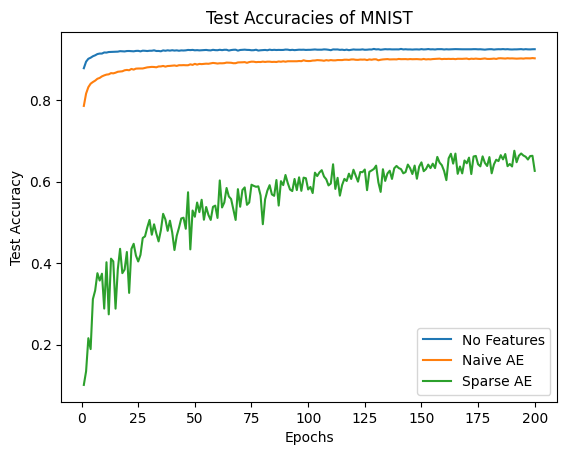

In [33]:
#plot test accuracy
folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename1 = 'softmax-mnist.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'naive-ae.csv'
df2 = pd.read_csv(folder + csv_filename2)
csv_filename3 = 'sparse-ae.csv'
df3 = pd.read_csv(folder + csv_filename3)

#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Test Accuracy'], label='No Features')
plt.plot(df2['Epoch'], df2['Test Accuracy'], label='Naive AE')
plt.plot(df3['Epoch'], df3['Test Accuracy'], label='Sparse AE')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracies of MNIST')
plt.show()

Q3. Neural Net

In [ ]:
#model
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = "sigmoid"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit model
nn_model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ['accuracy'])
nn_history = nn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200)

Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4433 - accuracy: 0.6986 - val_loss: 0.8786 - val_accuracy: 0.8269
Epoch 2/200
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7114 - accuracy: 0.8467 - val_loss: 0.5722 - val_accuracy: 0.8727
Epoch 3/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5297 - accuracy: 0.8722 - val_loss: 0.4648 - val_accuracy: 0.8877
Epoch 4/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4526 - accuracy: 0.8840 - val_loss: 0.4110 - val_accuracy: 0.8941
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4095 - accuracy: 0.8913 - val_loss: 0.3784 - val_accuracy: 0.8995
Epoch 6/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8962 - val_loss: 0.3558 - val_accuracy: 0.9043
Epoch 7/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3618 - accuracy: 0.9003 - val_loss: 0.3393 - val_a

In [ ]:
#save model
nn_model.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/nn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#save the accuracies
data = {'Epoch': list(range(1, len(nn_history.history['val_accuracy']) + 1)),
        'Test Accuracy': nn_history.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'nn-mnist.csv'
df.to_csv(folder + csv_filename, index=False)

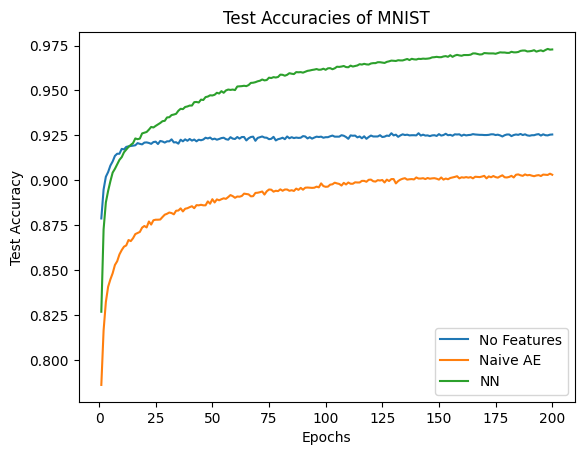

In [ ]:
#plot the 3 accuracies together

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename1 = 'softmax-mnist.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'naive-ae.csv'
df2 = pd.read_csv(folder + csv_filename2)
csv_filename3 = 'nn-mnist.csv'
df3 = pd.read_csv(folder + csv_filename3)


#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Test Accuracy'], label='No Features')
plt.plot(df2['Epoch'], df2['Test Accuracy'], label='Naive AE')
plt.plot(df3['Epoch'], df3['Test Accuracy'], label='NN')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracies of MNIST')
plt.show()

Q4. 1. Backpropagation

a. Naive

In [ ]:
#get encoder weights
autoencoder_h5 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive.h5')
encoder_weights = autoencoder_h5.layers[1].get_weights()

In [ ]:
#model with encoder's weights and adding a hidden layer with 100 and 10 units
ae_naive_bp_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (784,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation = "sigmoid",weights = encoder_weights),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
ae_naive_bp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile model
ae_naive_bp_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#fit model
history_naive_bp = ae_naive_bp_model.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3595 - accuracy: 0.9008 - val_loss: 0.3380 - val_accuracy: 0.9086
Epoch 2/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3413 - accuracy: 0.9052 - val_loss: 0.3222 - val_accuracy: 0.9126
Epoch 3/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3262 - accuracy: 0.9094 - val_loss: 0.3087 - val_accuracy: 0.9167
Epoch 4/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.9129 - val_loss: 0.2966 - val_accuracy: 0.9199
Epoch 5/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3018 - accuracy: 0.9159 - val_loss: 0.2863 - val_accuracy: 0.9212
Epoch 6/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2917 - accuracy: 0.9181 - val_loss: 0.2776 - val_accuracy: 0.9232
Epoch 7/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2829 - accuracy: 0.9208 - val_loss: 0.2702 - val_ac

In [ ]:
#save model
ae_naive_bp_model.save("/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_naive_bp_model.h5")

In [ ]:
#save the accuracies
data = {'Epoch': list(range(1, len(history_naive_bp.history['val_accuracy']) + 1)),
        'Test Accuracy': history_naive_bp.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'ae-naive-bp.csv'
df.to_csv(folder + csv_filename, index=False)

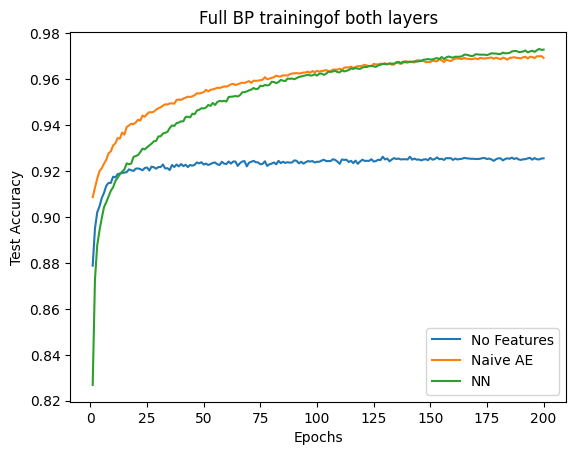

In [ ]:
#plot the 3 accuracies together
#plot test accuracy

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename1 = 'softmax-mnist.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'ae-naive-bp.csv'
df2 = pd.read_csv(folder + csv_filename2)
csv_filename3 = 'nn-mnist.csv'
df3 = pd.read_csv(folder + csv_filename3)


#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Test Accuracy'], label='No Features')
plt.plot(df2['Epoch'], df2['Test Accuracy'], label='Naive AE')
plt.plot(df3['Epoch'], df3['Test Accuracy'], label='NN')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Full BP trainingof both layers')
plt.show()

b. Sparse

In [13]:
#get encoder weights
autoencoder_sparse_h5 = load_model('/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse.h5', custom_objects={'custom_loss': custom_loss})
encoder_sparse_weights = autoencoder_sparse_h5.layers[1].get_weights()

In [14]:
#model with encoder's weights and adding a hidden layer with 100 and 10 units
ae_sparse_bp_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (784,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation = "sigmoid",weights = encoder_sparse_weights),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
ae_sparse_bp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#compile model
ae_sparse_bp_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#fit model
history_sparse_bp = ae_sparse_bp_model.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2841 - accuracy: 0.1572 - val_loss: 2.2338 - val_accuracy: 0.3668
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0527 - accuracy: 0.3989 - val_loss: 1.7564 - val_accuracy: 0.5817
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3961 - accuracy: 0.6691 - val_loss: 1.0870 - val_accuracy: 0.7501
Epoch 4/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9130 - accuracy: 0.7987 - val_loss: 0.7471 - val_accuracy: 0.8435
Epoch 5/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6653 - accuracy: 0.8512 - val_loss: 0.5725 - val_accuracy: 0.8717
Epoch 6/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5376 - accuracy: 0.8719 - val_loss: 0.4788 - val_accuracy: 0.8851
Epoch 7/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4659 - accuracy: 0.8853 - val_loss: 0.4227 - val_ac

In [16]:
#save model
ae_sparse_bp_model.save("/content/gdrive/MyDrive/DLS-codes/HW1/models/ae_sparse_bp_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
#save the accuracies
data = {'Epoch': list(range(1, len(history_sparse_bp.history['val_accuracy']) + 1)),
        'Test Accuracy': history_sparse_bp.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'ae-sparse-bp.csv'
df.to_csv(folder + csv_filename, index=False)

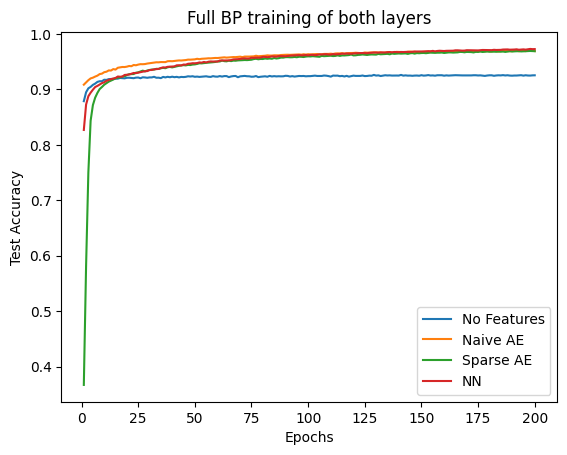

In [18]:
#plot the 3 accuracies together
#plot test accuracy

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename1 = 'softmax-mnist.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'ae-naive-bp.csv'
df2 = pd.read_csv(folder + csv_filename2)
csv_filename3 = 'ae-sparse-bp.csv'
df3 = pd.read_csv(folder + csv_filename3)
csv_filename4 = 'nn-mnist.csv'
df4 = pd.read_csv(folder + csv_filename4)


#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Test Accuracy'], label='No Features')
plt.plot(df2['Epoch'], df2['Test Accuracy'], label='Naive AE')
plt.plot(df3['Epoch'], df3['Test Accuracy'], label='Sparse AE')
plt.plot(df4['Epoch'], df4['Test Accuracy'], label='NN')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Full BP training of both layers')
plt.show()

2. MO3 slide 22
 - 5 hidden layers with 512 units

- logistic sigmoid with random initialization and Xavier initilization
- Relu with normal initialisation, Xavier and Kaming He initialisation


In [ ]:
#1. logistic sigmoid with normal initialisation
initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 0.01)

logistic_normal = tf.keras.Sequential([
                  tf.keras.layers.Input(shape = (784,)),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(10, activation ='softmax')])
logistic_normal.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
#fit model
logistic_normal.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_logistic_normal = logistic_normal.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 41s 21ms/step - loss: 2.3119 - accuracy: 0.1018 - val_loss: 2.3057 - val_accuracy: 0.1009
Epoch 2/50
1875/1875 [==============================] - 43s 23ms/step - loss: 2.3116 - accuracy: 0.1029 - val_loss: 2.3109 - val_accuracy: 0.0982
Epoch 3/50
1875/1875 [==============================] - 51s 27ms/step - loss: 2.3108 - accuracy: 0.1052 - val_loss: 2.3043 - val_accuracy: 0.1135
Epoch 4/50
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3112 - accuracy: 0.1015 - val_loss: 2.3082 - val_accuracy: 0.1009
Epoch 5/50
1875/1875 [==============================] - 52s 28ms/step - loss: 2.3105 - accuracy: 0.1033 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 6/50
1875/1875 [==============================] - 40s 22ms/step - loss: 2.3099 - accuracy: 0.1037 - val_loss: 2.3052 - val_accuracy: 0.1028
Epoch 7/50
1875/1875 [==============================] - 35s 18ms/step - loss: 2.3093 - accuracy: 0.1044 - val_loss: 2.3147 -

In [ ]:
#save .h5 model
logistic_normal.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/logistic-randomnormal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


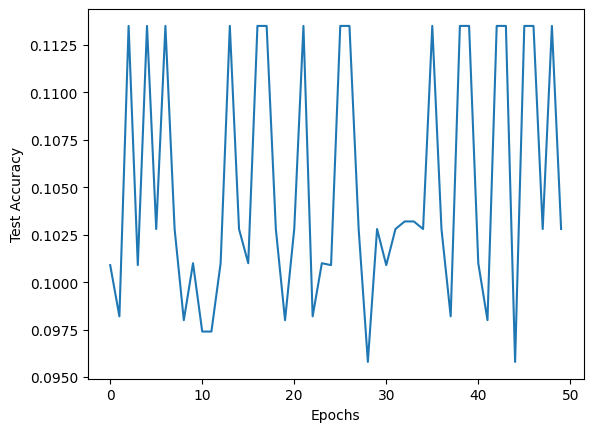

In [ ]:
#plot accuracy
plt.plot(history_logistic_normal.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#save accuracies
data = {'Epoch': list(range(1, len(history_logistic_normal.history['val_accuracy']) + 1)),
        'Test Accuracy': history_logistic_normal.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'logistic-randomnormal.csv'
df.to_csv(folder + csv_filename, index=False)

In [ ]:
#2. Logistic sigmoid with normal initialisation
initializer = tf.keras.initializers.GlorotNormal()

logistic_xavier = tf.keras.Sequential([
                  tf.keras.layers.Input(shape = (784,)),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'sigmoid' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(10, activation ='softmax')])
logistic_xavier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 1457674 (5.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit model
logistic_xavier.compile(optimizer = SGD(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_logistic_xavier = logistic_xavier.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
3750/3750 [==============================] - 68s 17ms/step - loss: 2.3031 - accuracy: 0.1084 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/50
3750/3750 [==============================] - 67s 18ms/step - loss: 2.3033 - accuracy: 0.1074 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 3/50
3750/3750 [==============================] - 66s 18ms/step - loss: 2.3033 - accuracy: 0.1072 - val_loss: 2.3047 - val_accuracy: 0.1010
Epoch 4/50
3750/3750 [==============================] - 67s 18ms/step - loss: 2.3031 - accuracy: 0.1097 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 5/50
3750/3750 [==============================] - 66s 18ms/step - loss: 2.3031 - accuracy: 0.1097 - val_loss: 2.3022 - val_accuracy: 0.0980
Epoch 6/50
3750/3750 [==============================] - 63s 17ms/step - loss: 2.3033 - accuracy: 0.1069 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 7/50
3750/3750 [==============================] - 66s 18ms/step - loss: 2.3031 - accuracy: 0.1088 - val_loss: 2.3030 -

In [ ]:
#save .h5 model
logistic_xavier.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/logistic-xavier.h5')

#save accuracies
data = {'Epoch': list(range(1, len(history_logistic_normal.history['val_accuracy']) + 1)),
        'Test Accuracy': history_logistic_normal.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'logistic-xavier.csv'
df.to_csv(folder + csv_filename, index=False)

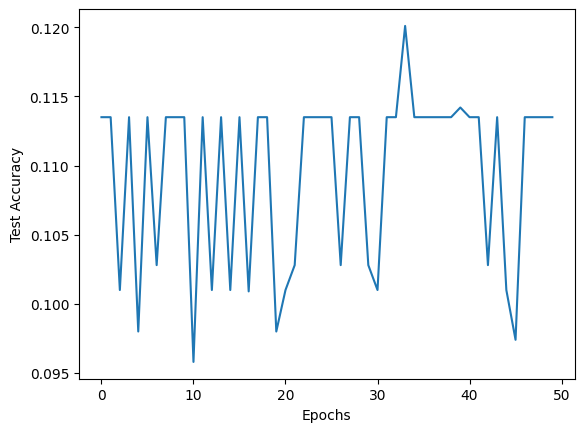

In [ ]:
#plot accuracy
plt.plot(history_logistic_xavier.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#3. relu with random normal initialisation µ = 0, σ = 0.01

initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 0.01)

relu_random_normal = tf.keras.Sequential([
                  tf.keras.layers.Input(shape = (784,)),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(10, activation ='softmax')])

relu_random_normal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 10)               

lr bt acc
- 0.0001 16/32 11 for 50
- 0.01 32 11 till 7th epoch
- 0.01 16 11 till 5th epoch

In [ ]:
#fit model
relu_random_normal.compile(optimizer = SGD(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_relu_random_normal = relu_random_normal.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
3750/3750 [==============================] - 55s 14ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/50
3750/3750 [==============================] - 50s 13ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/50
3750/3750 [==============================] - 52s 14ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 4/50
3750/3750 [==============================] - 51s 14ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 5/50
3750/3750 [==============================] - 52s 14ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1135
Epoch 6/50
3750/3750 [==============================] - 52s 14ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1135
Epoch 7/50
3750/3750 [==============================] - 52s 14ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3008 -

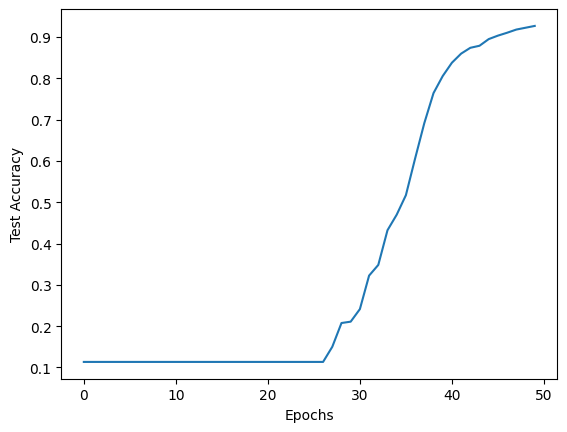

In [ ]:
#plot accuracy
plt.plot(history_relu_random_normal.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#save .h5 model
relu_random_normal.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/relu_normal.h5')

#save accuracies
data = {'Epoch': list(range(1, len(history_relu_random_normal.history['val_accuracy']) + 1)),
        'Test Accuracy': history_relu_random_normal.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'relu_random_normal.csv'
df.to_csv(folder + csv_filename, index=False)

In [ ]:
#4. relu with xavier initialisation
initializer = tf.keras.initializers.GlorotNormal()

relu_xavier = tf.keras.Sequential([
                  tf.keras.layers.Input(shape = (784,)),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(10, activation ='softmax')])

relu_xavier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 10)               

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 1457674 (5.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit model
relu_xavier.compile(optimizer = SGD(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_relu_xavier = relu_xavier.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 30s 15ms/step - loss: 2.0423 - accuracy: 0.4997 - val_loss: 1.5346 - val_accuracy: 0.7393
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.9322 - accuracy: 0.8054 - val_loss: 0.5609 - val_accuracy: 0.8595
Epoch 3/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4828 - accuracy: 0.8702 - val_loss: 0.3965 - val_accuracy: 0.8901
Epoch 4/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3820 - accuracy: 0.8926 - val_loss: 0.3364 - val_accuracy: 0.9041
Epoch 5/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3358 - accuracy: 0.9040 - val_loss: 0.3088 - val_accuracy: 0.9116
Epoch 6/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3063 - accuracy: 0.9122 - val_loss: 0.2818 - val_accuracy: 0.9184
Epoch 7/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2842 - accuracy: 0.9184 - val_loss: 0.2645 -

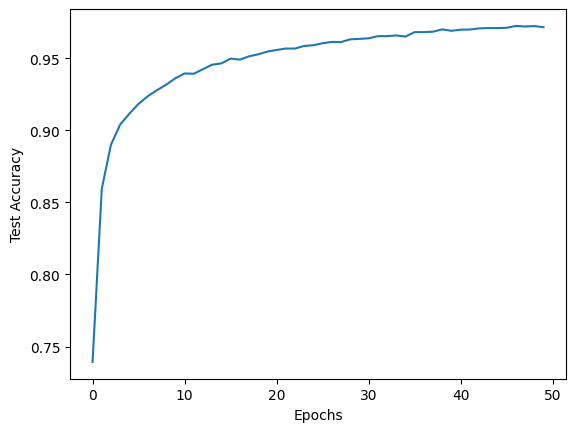

In [ ]:
#plot accuracy
plt.plot(history_relu_xavier.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#save .h5 model
relu_xavier.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/relu_xavier.h5')

#save accuracies
data = {'Epoch': list(range(1, len(history_relu_xavier.history['val_accuracy']) + 1)),
        'Test Accuracy': history_relu_xavier.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'relu_xavier.csv'
df.to_csv(folder + csv_filename, index=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#5. relu with kaiming he initialisation

initializer = tf.keras.initializers.HeNormal()

relu_he = tf.keras.Sequential([
                  tf.keras.layers.Input(shape = (784,)),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(512, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(10, activation ='softmax')])

relu_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
#fit model
relu_he.compile(optimizer = SGD(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_relu_he = relu_he.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 30s 15ms/step - loss: 1.1207 - accuracy: 0.7113 - val_loss: 0.4840 - val_accuracy: 0.8709
Epoch 2/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4094 - accuracy: 0.8871 - val_loss: 0.3289 - val_accuracy: 0.9061
Epoch 3/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3152 - accuracy: 0.9099 - val_loss: 0.2771 - val_accuracy: 0.9204
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2712 - accuracy: 0.9222 - val_loss: 0.2458 - val_accuracy: 0.9296
Epoch 5/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2429 - accuracy: 0.9306 - val_loss: 0.2247 - val_accuracy: 0.9340
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2208 - accuracy: 0.9369 - val_loss: 0.2103 - val_accuracy: 0.9377
Epoch 7/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2036 - accuracy: 0.9420 - val_loss: 0.1944 -

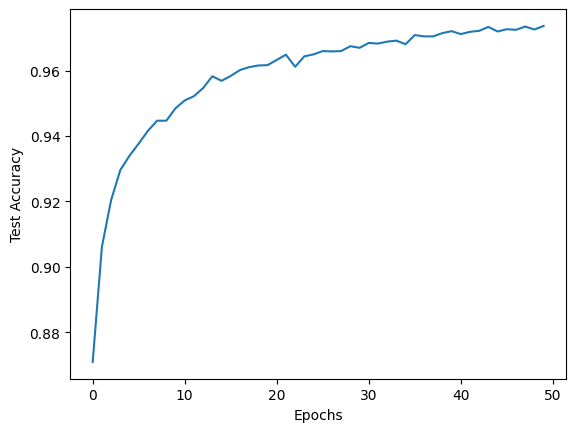

In [ ]:
#plot accuracy
plt.plot(history_relu_he.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#save .h5 model
relu_he.save('/content/gdrive/MyDrive/DLS-codes/HW1/models/relu_he.h5')

#save accuracies
data = {'Epoch': list(range(1, len(history_relu_he.history['val_accuracy']) + 1)),
        'Test Accuracy': history_relu_he.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename = 'relu_he.csv'
df.to_csv(folder + csv_filename, index=False)

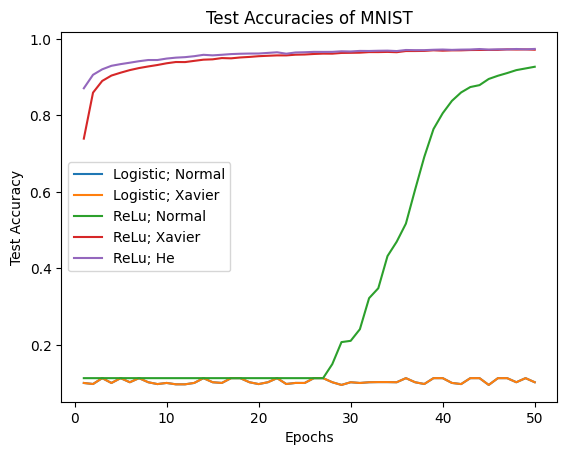

In [21]:
#plot all accuracies together
#logistic sigmoid with random normal
#logistic sigmoid with xavier
#relu with random normal
#relu with xavier
#relu with kaimng he

#plot test accuracy
folder = '/content/gdrive/MyDrive/DLS-codes/HW1/csv/'
csv_filename1 = 'logistic-randomnormal.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'logistic-xavier.csv'
df2 = pd.read_csv(folder + csv_filename2)
csv_filename3 = 'relu_random_normal.csv'
df3 = pd.read_csv(folder + csv_filename3)
csv_filename4 = 'relu_xavier.csv'
df4 = pd.read_csv(folder + csv_filename4)
csv_filename5 = 'relu_he.csv'
df5 = pd.read_csv(folder + csv_filename5)

#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Test Accuracy'], label='Logistic; Normal')
plt.plot(df2['Epoch'], df2['Test Accuracy'], label='Logistic; Xavier')
plt.plot(df3['Epoch'], df3['Test Accuracy'], label='ReLu; Normal')
plt.plot(df4['Epoch'], df4['Test Accuracy'], label='ReLu; Xavier')
plt.plot(df5['Epoch'], df5['Test Accuracy'], label='ReLu; He')

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracies of MNIST')
plt.show()